# Multi-class Classification

## Import the Libraries

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Let's explore the `./dataset` folder containing the images. There is a subdirectory for each class. In this case there will be 17 folders one for each food label in the alphabet.

The complete tree looks like this:

```
.└── dataset/
    ├── train/
    |    ├── ayam/
    |    │   ├── ayam1.jpg
    |    │   ├── ayam2.jpg
    |    │   └── ...
    |    ├── brokoli/
    |        ├── brokoli1.jpg
    |        ├── brokoli2.jpg
    |        └── ...
    |    ├── ...
    |    ├── telur/
    |    |    ├── telur1.jpg
    |    |    ├── telur2.jpg
    |    |    └── ...
    |    ├── tomat/
    |    |    ├── tomat1.jpg
    |    |    ├── tomat2.jpg
    |    |    └── ...
    |    ├── ...
    |    └── wortel/
    |        ├── wortel1.jpg
    |        ├── wortel2.jpg
    |        └── ...
    └── validation/
    |    ├── ayam/
    |    │   ├── ayam1.jpg
    |    │   ├── ayam2.jpg
    |    │   └── ...
    |    ├── brokoli/
    |        ├── brokoli1.jpg
    |        ├── brokoli2.jpg
    |        └── ...
    |    ├── ...
    |    ├── telur/
    |    |    ├── telur1.jpg
    |    |    ├── telur2.jpg
    |    |    └── ...
    |    ├── tomat/
    |    |    ├── tomat1.jpg
    |    |    ├── tomat2.jpg
    |    |    └── ...
    |    ├── ...
    |    └── wortel/
    |        ├── wortel1.jpg
    |        ├── wortel2.jpg
    |        └── ...
    └── test/
         ├── ayam/
         │   ├── ayam1.jpg
         │   ├── ayam2.jpg
         │   └── ...
         ├── brokoli/
         ├    ├── brokoli1.jpg
         ├    ├── brokoli2.jpg
         ├    └── ...
         ├── ...
         ├── telur/
         |    ├── telur1.jpg
         |    ├── telur2.jpg
         |    └── ...
         ├── tomat/
         |    ├── tomat1.jpg
         |    ├── tomat2.jpg
         |    └── ...
         ├── ...
         └── wortel/
             ├── wortel1.jpg
             ├── wortel2.jpg
             └── ...
``` 

In [26]:
TRAIN_DIR = 'dataset/train/'
VALIDATION_DIR = 'dataset/validation/'
TEST_DIR = 'dataset/test/'

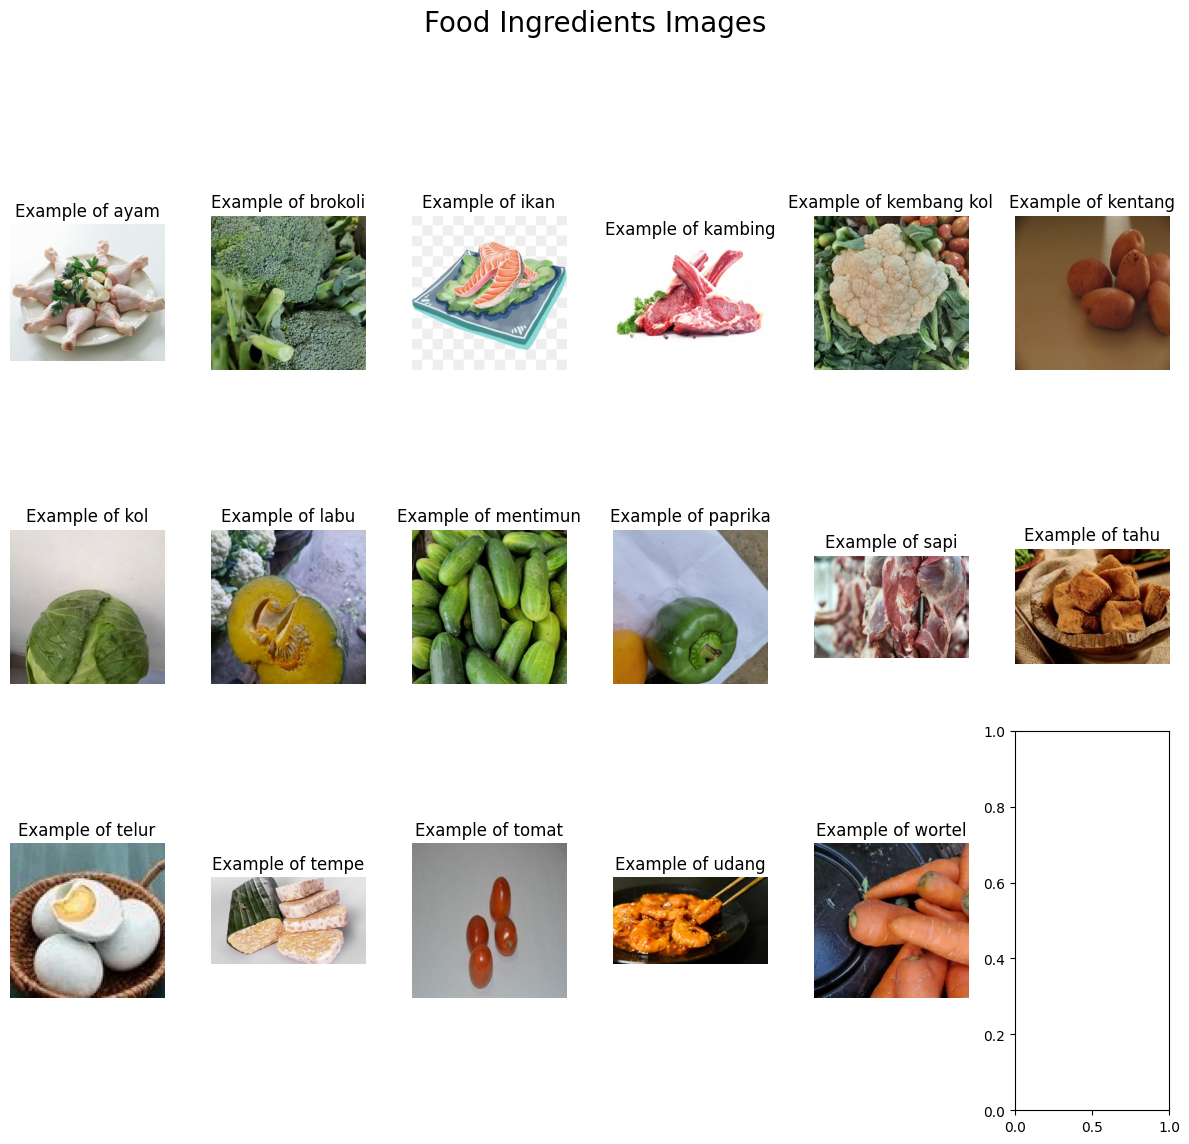

In [27]:
folder_names = os.listdir('./dataset/train')

num_columns = 6 
num_rows = (len(folder_names) + num_columns - 1) // num_columns 

fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 4 * num_rows))
fig.suptitle('Food Ingredients Images', fontsize=20)

axes = axes.flatten()

for ii, folder in enumerate(folder_names):
    dir = f'./dataset/train/{folder}'
    
    if os.listdir(dir):  
        img_path = os.path.join(dir, os.listdir(dir)[0]) 
        img = tf.keras.preprocessing.image.load_img(img_path)  
        axes[ii].imshow(img)
        axes[ii].set_title(f'Example of {folder}')  
        axes[ii].axis('off')
    else:
        axes[ii].set_title(f'No images in {folder}') 
        axes[ii].axis('off')  
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [28]:
# Convert the image into its numpy array representation
sample_array = tf.keras.preprocessing.image.img_to_array(img)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (224, 224, 3)


In [29]:
sample_array[0,:5]

array([[ 35.,  49.,  76.],
       [ 32.,  47.,  76.],
       [ 43.,  60.,  90.],
       [ 59.,  79., 112.],
       [ 71.,  95., 131.]], dtype=float32)

## Creating the datasets for the CNN

In [35]:
def train_val_datasets():
    train_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=TRAIN_DIR,
        batch_size=32,
        image_size=(224, 224),
		label_mode='categorical',
    ) 
    
    validation_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=VALIDATION_DIR,
        batch_size=32,
        image_size=(224, 224),
		label_mode='categorical',
    ) 

    test_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=TEST_DIR,
        batch_size=32,
        image_size=(224, 224),
		label_mode='categorical',
    ) 
    return train_dataset, validation_dataset, test_dataset

In [38]:
# Create train and validation datasets
train_dataset, validation_dataset,test_dataset = train_val_datasets()
print()
print(f"Images of train dataset have shape: {train_dataset.element_spec[0].shape}")
print(f"Labels of train dataset have shape: {train_dataset.element_spec[1].shape}")
print()
print(f"Images of validation dataset have shape: {validation_dataset.element_spec[0].shape}")
print(f"Labels of validation dataset have shape: {validation_dataset.element_spec[1].shape}")   
print()
print(f"Images of test dataset have shape: {test_dataset.element_spec[0].shape}")
print(f"Labels of test dataset have shape: {test_dataset.element_spec[1].shape}")   

Found 11195 files belonging to 17 classes.
Found 1399 files belonging to 17 classes.
Found 1398 files belonging to 17 classes.

Images of train dataset have shape: (None, 224, 224, 3)
Labels of train dataset have shape: (None, 17)

Images of validation dataset have shape: (None, 224, 224, 3)
Labels of validation dataset have shape: (None, 17)

Images of test dataset have shape: (None, 224, 224, 3)
Labels of test dataset have shape: (None, 17)


## Coding the CNN

In [48]:
def create_model():
    model = tf.keras.models.Sequential([ 
        tf.keras.Input(shape=(224, 224, 3)), 
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(17, activation='softmax')
        ]) 
    model.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

    return model

In [49]:
model = create_model()

In [50]:
print(f'Input shape: {model.input_shape}')
print(f'Output shape: {model.output_shape}')

Input shape: (None, 224, 224, 3)
Output shape: (None, 17)


In [51]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 788544)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 788544)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │   100,933,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,937,745 (385.05 MB)

 Trainable params: 100,937,745 (385.05 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
for images, labels in train_dataset.take(1):
	example_batch_images = images
	example_batch_labels = labels
	
try:
	model.evaluate(example_batch_images, example_batch_labels, verbose=False)
except:
	print("Your model is not compatible with the dataset you defined earlier. Check that the loss function, last layer and label_mode are compatible with one another.")
else:
	predictions = model.predict(example_batch_images, verbose=False)
	print(f"predictions have shape: {predictions.shape}")

predictions have shape: (32, 17)


# Train your model

In [62]:
history = model.fit(train_dataset,
                    epochs=15,
                    validation_data=validation_dataset)

Epoch 1/15


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=True
  • mask=None

In [60]:

def load_and_preprocess_image(path):
    try:
        img = tf.io.read_file(path)
        img = tf.image.decode_image(img, channels=3)
        img = tf.image.convert_image_dtype(img, tf.float32)  # Mengubah ke float32
        return img
    except tf.errors.InvalidArgumentError:
        return None  # Mengembalikan None jika gambar tidak valid

def get_image_dataset(directory):
    file_paths = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(('.jpg', '.jpeg', '.png'))]
    dataset = tf.data.Dataset.from_tensor_slices(file_paths)
    dataset = dataset.map(load_and_preprocess_image)  # Memuat dan memproses gambar
    dataset = dataset.filter(lambda img: img is not None)  # Menghapus gambar yang tidak valid
    return dataset

# Contoh penggunaan
train_dataset = get_image_dataset('./dataset/train/ayam')
